# Analyzing Changes in Electorate by Location

## Summary
This notebook analyzes trends related to the location of the Brazilian electorate Population, looking into how the location of immigrant Brazilian voters has changed over time.

---

## Importing and Cleaning Data
The following code imports and cleans the individual datasets and subsequently creates a single Pandas dataframe combining the data from all six data sets.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_cleaning.country_match import country_code_map as geomap
from data_cleaning import cleaning_utilities

In [2]:
def extract_dataframe(path: str, remove_extra_header=False):
    '''
    Creates a Pandas Data Frame from a CSV File and makes headers uniform (lower cases, separated by _ vs space)
    :param path - A path to a CSV File
    :param remove_extra_header - A boolean to indicate if there is an extra header (Portuguese) which can be removed
    :return a Pandas dataframe
    '''
    
    df = pd.DataFrame()
    
    if remove_extra_header:
        df = pd.read_csv(path, skiprows=[1])
        new_column_names = [x.lower().replace(' ','_') for x in df.columns]
        df.columns = new_column_names
        
    else:
        df = pd.read_csv(path)
        new_column_names = [x.lower().replace(' ','_') for x in df.columns]
        df.columns = new_column_names
        
    
    #Remove accents from country names
    df['country_name'] = df.apply(cleaning_utilities.remove_accents, axis=1)
    df = df.drop(columns=['municipality_name'])
    df = df.rename(columns={"country_name": "municipality_name"})
    
    return df

In [3]:
def standardize_country_code(df_orig):
    '''
    Standardizes post-2010 municipality codes to pre-2010 country codes
    :param df_orig - A Pandas dataframe
    :return a Pandas dataframe with the municipality code transformation applied

    '''
    df = df_orig.copy() #Create a copy of the dataframe
    
    #Iterate through dataframe and update municipality code and name
    for row_idx in df.index:
        code = df.at[row_idx, 'municipality_code']
        new_code, name = geomap[code]
        df.at[row_idx, 'municipality_code'] = new_code
        df.at[row_idx, 'municipality_name'] = name
    
    return df

In [4]:
def combine_data(*dfs):
    '''
    Combines multiple dataframes into a single Pandas dataframe
    :param dfs - a comma separated collection of dataframes
    :return a new Pandas dataframe with all dataframes combined

    '''
    dfs = list(dfs) #Convert to list
    
    df = dfs[0].copy() #Extract first element
    
    #Add remaining elements
    for dataframe in dfs[1:]:
        df = df.append(dataframe, ignore_index=True)

    return df

In [5]:
#Create Dataframes from each electorate data file

df_1998 = extract_dataframe('../data/perfil_eleitorado_1998.csv', remove_extra_header=True)
df_2002 = extract_dataframe('../data/perfil_eleitorado_2002.csv', remove_extra_header=True)
df_2006 = extract_dataframe('../data/perfil_eleitorado_2006.csv', remove_extra_header=True)
df_2010 = extract_dataframe('../data/perfil_eleitorado_2010.csv', remove_extra_header=False)
df_2014 = extract_dataframe('../data/perfil_eleitorado_2014.csv', remove_extra_header=True)
df_2018 = extract_dataframe('../data/perfil_eleitorado_2018.csv', remove_extra_header=True)

In [6]:
#Standardize Post 2010 data to use pre-2010 country codes
df_2010_std = standardize_country_code(df_2010)
df_2014_std = standardize_country_code(df_2014)
df_2018_std = standardize_country_code(df_2018)

In [7]:
#Create Combined Data Frame (all years)
df_combined = combine_data(df_1998, df_2002, df_2006, df_2010_std, df_2014_std, df_2018_std)
print("Aggregate Data")
df_combined


Aggregate Data


,election_year,place_(zz_=_exterior),municipality_code,gender_code,gender_description,marital_status_code,marital_status_description,age_group_code,age_group_description,educational_attainment_code,educational_attainment_description,quantity_of_voters,municipality_name
0,1998,ZZ,11487,2,MASCULINO,-3.0,#NE,-3.0,#NE,0.0,NÃO INFORMADO,57,POLONIA
1,1998,ZZ,98361,2,MASCULINO,-3.0,#NE,-3.0,#NE,0.0,NÃO INFORMADO,44,NIGERIA
2,1998,ZZ,98965,2,MASCULINO,-3.0,#NE,-3.0,#NE,0.0,NÃO INFORMADO,95,ANGOLA
3,1998,ZZ,98507,4,FEMININO,-3.0,#NE,-3.0,#NE,0.0,NÃO INFORMADO,95,COSTA RICA
4,1998,ZZ,98620,4,FEMININO,-3.0,#NE,-3.0,#NE,0.0,NÃO INFORMADO,12,BULGARIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76996,2018,ZZ,29190,2,MASCULINO,3.0,CASADO,5559.0,55 a 59 anos,8.0,SUPERIOR COMPLETO,3,JAMAICA
76997,2018,ZZ,29190,2,MASCULINO,3.0,CASADO,6569.0,65 a 69 anos,7.0,SUPERIOR INCOMPLETO,1,JAMAICA
76998,2018,ZZ,29190,2,MASCULINO,9.0,DIVORCIADO,5559.0,55 a 59 anos,7.0,SUPERIOR INCOMPLETO,1,JAMAICA
76999,2018,ZZ,29190,4,FEMININO,3.0,CASADO,4549.0,45 a 49 anos,6.0,ENSINO M<c9>DIO COMPLETO,1,JAMAICA


---

# Analysis

## Change in Total Number Voters
Below, we plot the total number of Brazilian Immigrant voters by year. The number of Brazilian immigrant voters has increased for each dataset analyzed. Notably, the number of Brazilian immigrant roughly doubled between 2006 and 2010 as well as between 2010 and 2018. 

In [32]:
def plot_total_voters(df):
    '''
    Plots the Total Brazilian Immigrant Electorate by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Quantity of Voters By Year
    voters = df[["election_year", "quantity_of_voters"]].groupby("election_year").sum()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(voters.size),
        height=voters["quantity_of_voters"],
        tick_label=voters.index, 
        color = 'g'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Electorate Population")
    plt.title("Brazilian Immigrant Electorate Size by Year")
    
  

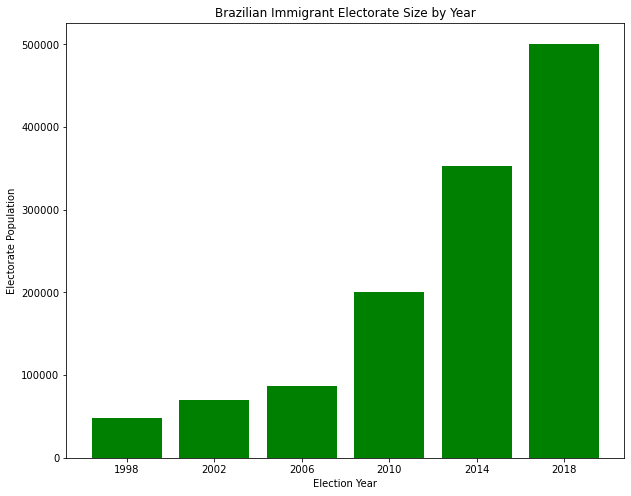

In [33]:
plot_total_voters(df_combined)

## Change in Countries with Brazilian Immigrant Voters
Below, we plot the number of countries with Brazilian immigrant voters by year. While the number of countries was rooughly flat between 1998 and 2006, this number been increasing since 2010. Notably, some of this increase may be due to the emergence of new countries (eg, Bosnia, Serbia, etc.) brought about by the breakup of countries like Yugoslavia and Czechoslovakia (prior to 2010, Yugoslavia and Czechoslovakia were used to identify any of the now-independent countries which comprised these nations) 

In [10]:
def plot_total_countries(df):
    '''
    Plots the Number of Countries in which the Electorate Resides by Year
    :param df - A pandas dataframe containing electorate data with all years labelled
    '''
    #Source for Bar Chart- https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
    
    #Gets Number of Unique Countries by Year
    countries = df[["election_year", "municipality_code"]].groupby("election_year").nunique()
    
    # Set default figure size.
    plt.rcParams['figure.figsize'] = (10,8)
    
    #Plot Graph
    plt.bar(
        x=np.arange(countries.size),
        height=countries["municipality_code"],
        tick_label=countries.index, 
        color = 'b'
    )
    
    #Add Labels and Title
    plt.xlabel("Election Year")
    plt.ylabel("Unique Country Count")
    plt.title("NUmber of Countries Represented by Brazilian Immigrant Electorate by Year")



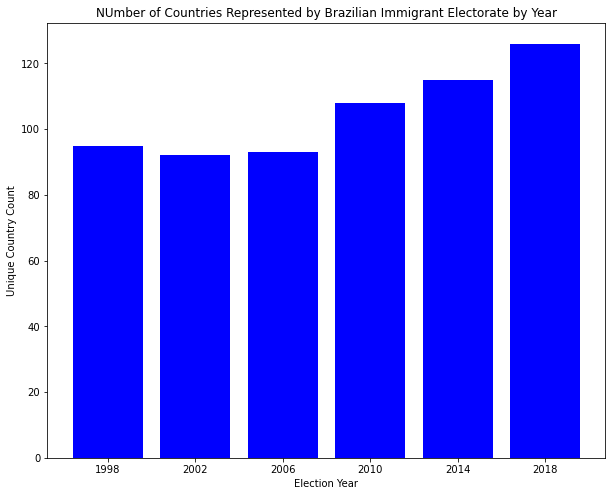

In [11]:
plot_total_countries(df_combined)

## Brazilian Immigrant Voters by Country

In [31]:
def calculate_country_pop(df):
    '''
    Determines Population among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country populations
    '''
    
    #Combine all voters by municipality code, country name, and year
    countries = df.groupby(["municipality_code", "municipality_name", "election_year"]).quantity_of_voters.sum().unstack()
    
    #Fills Nans with 0's
    countries = countries.fillna(0)
    
    #Sort by Population (descending)
    countries = countries.sort_values(by=[2018, 2014, 2010, 2006, 2002, 1998], ascending=False)
    
    
    return countries
    

In [ ]:
countries = calculate_country_pop(df_combined)

### Countries with Most Brazilian Immigrant Voters
Below, we list the top 10 countries with the most Brazilian Immigrant Voters for each Presidential Election year (1998-2018)

### 1998
In 1998, the United States, Italy, Portugal, and Germany contained the most Brazilian Immigrant Voters

In [35]:
countries = countries.sort_values(by=[1998], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0
11800,BOLIVIA,1671.0,1426.0,1141.0,1671.0,2348.0,3050.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0


### 2002
In 2002, the United States, Portugal, Italy, and Germany contained the most Brazilian Immigrant Voters (with Portugal surpassing Italy for second place)

In [36]:
countries = countries.sort_values(by=[2002], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0
11320,GUIANA FRANCESA,1303.0,1534.0,1613.0,3278.0,3519.0,3641.0


### 2006
In 2006, the top 4 countries remained the same (though Englnd surpassed Switzerland for 5th place)

In [37]:
countries = countries.sort_values(by=[2006], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
11444,PARAGUAI,740.0,987.0,2292.0,4155.0,6161.0,7518.0
11282,FRANCA,2007.0,2000.0,2145.0,3947.0,8807.0,11047.0


### 2010
In 2010, the number of voters in Japan appears to increase 20x, moving the country into 4th place

In [38]:
countries = countries.sort_values(by=[2010], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0


### 2014
In 2014, Japan moved past Portugal and Italy to become the country with the second most Brazilian immigrant voters

In [39]:
countries = countries.sort_values(by=[2014], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0


### 2018
In 2018, the top countries for Brazilian voters remained roughly the same, with England surpassing Italy for 4th place

In [40]:
countries = countries.sort_values(by=[2018], ascending=False)
countries.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11266,ESTADOS UNIDOS,11474.0,24461.0,32017.0,66940.0,112252.0,160005.0
11380,JAPAO,625.0,654.0,558.0,11827.0,37638.0,60708.0
11509,PORTUGAL,3660.0,6431.0,7630.0,23182.0,29660.0,39118.0
98841,INGLATERRA,1410.0,2728.0,3540.0,6981.0,16926.0,25917.0
11363,ITALIA,4169.0,4703.0,4699.0,14903.0,21168.0,25478.0
11100,ALEMANHA,3513.0,3968.0,4515.0,8533.0,18113.0,25269.0
98906,CANADA,2009.0,2371.0,3086.0,7231.0,12942.0,22060.0
11240,ESPANHA,706.0,1276.0,1575.0,6304.0,13399.0,20762.0
11525,SUICA,3036.0,3166.0,2639.0,8296.0,15349.0,19668.0


### Growth of Brazilian Immigrant Voter Population by Country
Below, we list the top 10 fastest growing Brazilian Immigrant Voter populations by country for each Presidential Election year (1998-2018)

In [14]:
def calculate_country_growth(df, ignore_init=False):
    '''
    Calculates country growth rate among different countries over the 6 datasets
    :param df - A pandas dataframe containing electorate data 
    :return - A Dataframe containing the country growth rate
    '''
    
    #Source - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
    pct_change = df.pct_change(axis='columns', periods=1)
    
    if ignore_init:
        #Replace infinities with Nans
        #Source - https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
        pct_change.replace([np.inf, -np.inf], 100, inplace=True)
    else:
        pct_change.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    #Fills Nans with 0's
    pct_change = pct_change.fillna(0)

    return pct_change

In [ ]:
pct_change = calculate_country_growth(countries)

### 1998
As 1998 is our base year, there is no "previous year" from which to calculate growth.

In [42]:
pct_change = pct_change.sort_values(by=[1998], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98728,EMIRADOS ARABES,0.0,-0.303030,-0.173913,0.684211,6.375000,2.707627
39241,CAZAQUISTAO,0.0,0.000000,0.000000,0.000000,3.000000,0.750000
29033,IRLANDA,0.0,0.134146,0.301075,0.677686,2.083744,2.372204
11347,ISRAEL,0.0,0.045267,3.181102,-0.734463,1.223404,2.342903
11762,UCRANIA,0.0,0.250000,-0.600000,-0.250000,4.333333,1.937500
98140,TRINIDAD TOBAGO,0.0,-0.111111,0.041667,-0.160000,0.571429,1.878788
29025,HONG KONG,0.0,0.231343,-0.084848,0.158940,0.240000,1.599078
39209,ESLOVAKIA,0.0,0.000000,0.000000,0.000000,0.000000,1.500000
2828,TAIWAN,0.0,0.196970,0.113924,-0.045455,1.619048,1.400000


### 2002
In 2002, Syria, Kenya, Cuba, Zimbabwe, and Korea were the fastest growing countries in terms of Brazilian immigrant voter population.

In [43]:
pct_change = pct_change.sort_values(by=[2002], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98221,SIRIA,0.0,3.142857,0.632184,0.112676,0.424051,-0.133333
29165,KENIA,0.0,2.388889,-0.049180,-0.034483,0.250000,-0.028571
98868,CUBA,0.0,2.202128,0.524917,0.115468,-0.357422,-0.656535
29092,ZIMBABWE,0.0,2.000000,-0.333333,-0.333333,-0.125000,-0.285714
11207,COREIA,0.0,1.200000,-0.012987,-0.157895,0.062500,0.544118
98744,SUECIA,0.0,1.176724,0.437624,0.957300,0.363125,0.407847
11266,ESTADOS UNIDOS,0.0,1.131863,0.308900,1.090764,0.676905,0.425409
98060,GABAO,0.0,1.130435,0.061224,-0.173077,-0.395349,-0.192308
98841,INGLATERRA,0.0,0.934752,0.297654,0.972034,1.424581,0.531195


### 2006
In 2006, Namibia, Israel, Libya, Algeria, and New Zealand were the fastest growing countries in terms of Brazilian immigrant voter population.

In [45]:
pct_change = pct_change.sort_values(by=[2006], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
29068,NAMIBIA,0.0,0.000000,3.600000,0.217391,0.785714,0.020000
11347,ISRAEL,0.0,0.045267,3.181102,-0.734463,1.223404,2.342903
11401,LIBANO,0.0,0.031830,2.179949,0.084074,0.715138,0.920435
98701,ARGELIA,0.0,-0.777778,2.000000,4.333333,-0.531250,0.000000
29050,NOVA ZELANDIA,0.0,0.000000,1.500000,4.894118,0.846307,1.009730
11444,PARAGUAI,0.0,0.333784,1.322188,0.812827,0.482792,0.220256
98965,ANGOLA,0.0,0.070922,1.026490,-0.101307,-0.221818,0.598131
98981,AUSTRALIA,0.0,0.308157,0.912240,1.391304,1.885354,0.442675
29130,MALASIA,0.0,-0.394737,0.826087,0.452381,0.344262,0.560976


### 2010
In 2010, the population of Brazilian voters in Japan increased roughly 20x over 2006. Jamaica similarly expdrienced a major increase

In [46]:
pct_change = pct_change.sort_values(by=[2010], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
11380,JAPAO,0.0,0.046400,-0.146789,20.195341,2.182379,0.612944
29190,JAMAICA,0.0,-1.000000,0.000000,12.333333,0.175000,1.000000
29050,NOVA ZELANDIA,0.0,0.000000,1.500000,4.894118,0.846307,1.009730
11541,SURINAME,0.0,-0.094527,-0.148352,4.580645,1.675145,-0.191876
98701,ARGELIA,0.0,-0.777778,2.000000,4.333333,-0.531250,0.000000
11240,ESPANHA,0.0,0.807365,0.234326,3.002540,1.125476,0.549519
98540,CHINA,0.0,0.833333,-0.247475,2.342282,0.415663,0.493617
11363,ITALIA,0.0,0.128088,-0.000851,2.171526,0.420385,0.203609
11525,SUICA,0.0,0.042819,-0.166456,2.143615,0.850169,0.281386


### 2014
In 2014, the UAE had the most growth in terms of its Brazilian immigrant over population (637%), with Ukraine following in second place

In [47]:
pct_change = pct_change.sort_values(by=[2014], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98728,EMIRADOS ARABES,0.0,-0.303030,-0.173913,0.684211,6.375000,2.707627
11762,UCRANIA,0.0,0.250000,-0.600000,-0.250000,4.333333,1.937500
39020,CROACIA,0.0,0.000000,0.000000,0.000000,3.090909,0.244444
39241,CAZAQUISTAO,0.0,0.000000,0.000000,0.000000,3.000000,0.750000
11428,MEXICO,0.0,-0.175481,-0.107872,1.392157,2.443989,0.356208
11380,JAPAO,0.0,0.046400,-0.146789,20.195341,2.182379,0.612944
98108,TURQUIA,0.0,-0.325581,-0.137931,0.280000,2.125000,1.010000
29033,IRLANDA,0.0,0.134146,0.301075,0.677686,2.083744,2.372204
98981,AUSTRALIA,0.0,0.308157,0.912240,1.391304,1.885354,0.442675


### 2018
In 2018, the UAE continued to experience the most growth in its Brazilian immigrant voter population (compared with the previous election year) and Vietnam experience the second highest growth rate after having a negative growth rate in it Brazilian immigrant voter population between 2010 and 2014

In [49]:
pct_change = pct_change.sort_values(by=[2018], ascending=False)
pct_change.head(10)

,election_year,1998,2002,2006,2010,2014,2018
municipality_code,municipality_name,,,,,,
98728,EMIRADOS ARABES,0.0,-0.303030,-0.173913,0.684211,6.375000,2.707627
2800,VIETNA,0.0,-0.285714,0.000000,1.800000,-0.214286,2.545455
29033,IRLANDA,0.0,0.134146,0.301075,0.677686,2.083744,2.372204
11347,ISRAEL,0.0,0.045267,3.181102,-0.734463,1.223404,2.342903
11762,UCRANIA,0.0,0.250000,-0.600000,-0.250000,4.333333,1.937500
98140,TRINIDAD TOBAGO,0.0,-0.111111,0.041667,-0.160000,0.571429,1.878788
29025,HONG KONG,0.0,0.231343,-0.084848,0.158940,0.240000,1.599078
39209,ESLOVAKIA,0.0,0.000000,0.000000,0.000000,0.000000,1.500000
2828,TAIWAN,0.0,0.196970,0.113924,-0.045455,1.619048,1.400000
